# 基本的な分布の確認

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import atlasify
import h5py as h5

from modules import file_util

%matplotlib inline
plt.rcParams["font.size"] = 15

2023-12-22 19:52:45.348255: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
ttbar_path = "/home/suzukiy/ftag/umami-dataset/umami-020-GNx/prepared/inclusive_testing_ttbar_PFlow.h5"
zprime_path = "/home/suzukiy/ftag/umami-dataset/umami-020-GNx/prepared/inclusive_testing_zprime_PFlow.h5"

In [3]:
file_util.display_h5_file(ttbar_path)

Displaying contents of file: /home/suzukiy/ftag/umami-dataset/umami-020-GNx/prepared/inclusive_testing_ttbar_PFlow.h5
/jets: [Dataset](4042856,)
/tracks_default: [Dataset](4042856, 40)
/tracks_loose: [Dataset](4042856, 40)


In [4]:
with h5.File(ttbar_path, "r") as f:
    ttbar = pd.DataFrame(f["jets"][:])

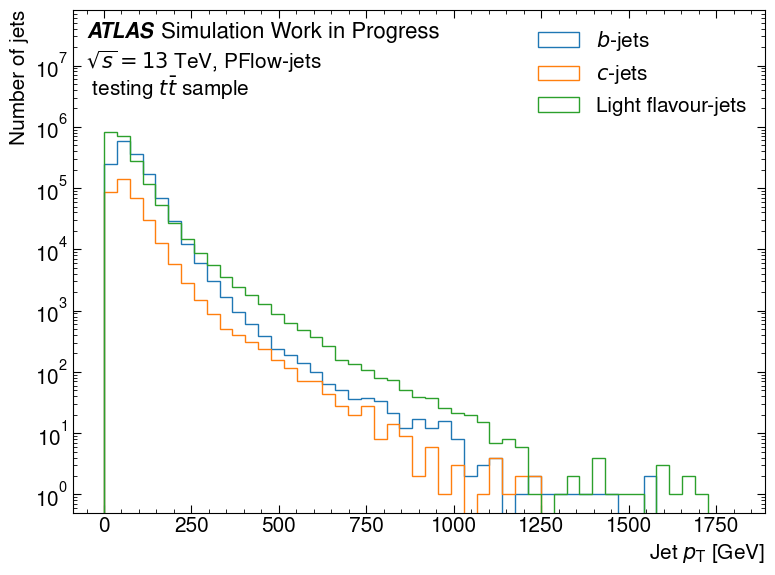

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(0, 1800, 50)
ax.hist(ttbar["pt"][ttbar["HadronConeExclTruthLabelID"]==5]/1000, bins=bins, histtype="step", label="$b$-jets")
ax.hist(ttbar["pt"][ttbar["HadronConeExclTruthLabelID"]==4]/1000, bins=bins, histtype="step", label="$c$-jets")
ax.hist(ttbar["pt"][ttbar["HadronConeExclTruthLabelID"]==0]/1000, bins=bins, histtype="step", label="Light flavour-jets")
ax.set_xlabel("Jet $p_{\mathrm{T}}$ [GeV]", loc="right")
ax.set_ylabel("Number of jets", loc="top")
ax.set_yscale("log")

atlasify.atlasify(
    axes=ax,
    atlas="Simulation Work in Progress",
    subtext="$\sqrt{s}=13$ TeV, PFlow-jets \n testing $t\\bar{t}$ sample",
    enlarge=50,
    font_size=15,
    sub_font_size=15,
    subtext_distance=0.15,
)
plt.tight_layout()
plt.savefig("figures/pt_ttbar.pdf", bbox_inches="tight")
plt.show()

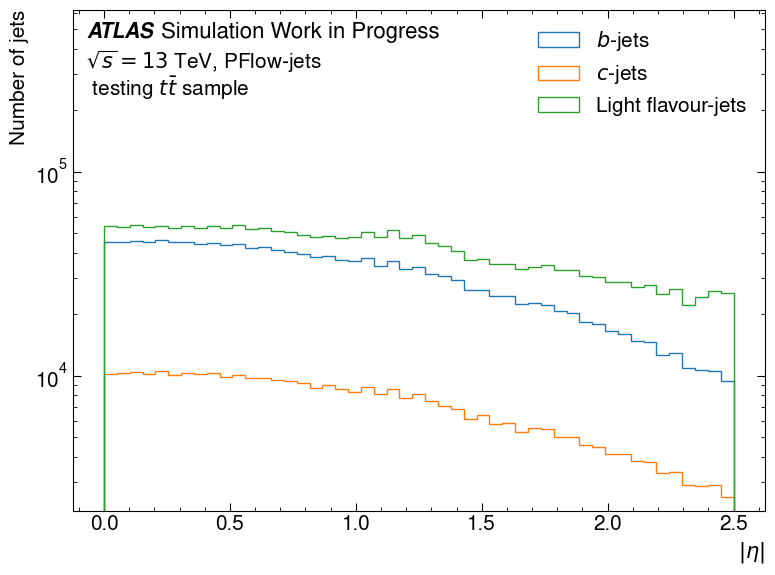

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(0, 2.5, 50)
ax.hist((ttbar["eta"].abs())[ttbar["HadronConeExclTruthLabelID"]==5], bins=bins, histtype="step", label="$b$-jets")
ax.hist((ttbar["eta"].abs())[ttbar["HadronConeExclTruthLabelID"]==4], bins=bins, histtype="step", label="$c$-jets")
ax.hist((ttbar["eta"].abs())[ttbar["HadronConeExclTruthLabelID"]==0], bins=bins, histtype="step", label="Light flavour-jets")
ax.set_xlabel("$|\eta|$", loc="right")
ax.set_ylabel("Number of jets", loc="top")
ax.set_yscale("log")

atlasify.atlasify(
    axes=ax,
    atlas="Simulation Work in Progress",
    subtext="$\sqrt{s}=13$ TeV, PFlow-jets \n testing $t\\bar{t}$ sample",
    enlarge=10,
    font_size=15,
    sub_font_size=15,
    subtext_distance=0.15,
)
plt.tight_layout()
plt.savefig("figures/absEta_ttbar.pdf", bbox_inches="tight")
plt.show()

In [7]:
with h5.File(ttbar_path, "r") as f:
    # print(len(f["tracks_loose"]))
    ntracks_ttbar = f["tracks_loose"]["valid"][:].sum(axis=1)

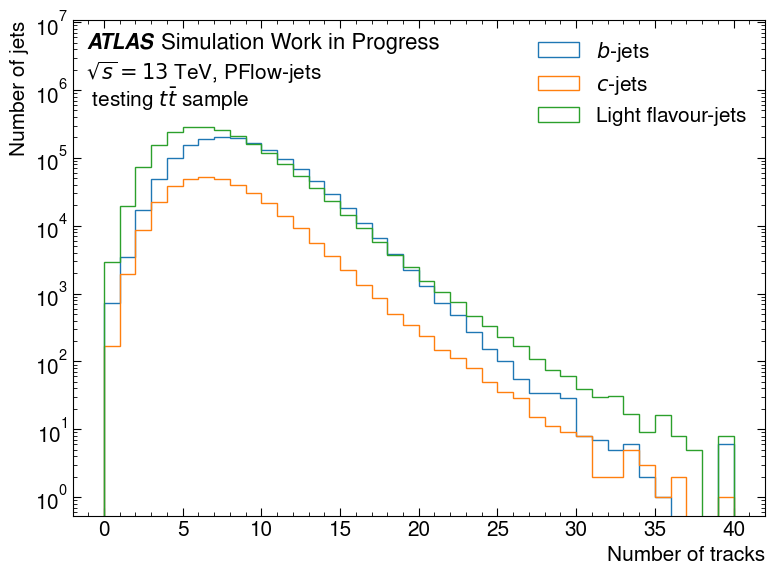

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(0, 40, 41)
ax.hist(ntracks_ttbar[ttbar["HadronConeExclTruthLabelID"]==5], bins=bins, histtype="step", label="$b$-jets")
ax.hist(ntracks_ttbar[ttbar["HadronConeExclTruthLabelID"]==4], bins=bins, histtype="step", label="$c$-jets")
ax.hist(ntracks_ttbar[ttbar["HadronConeExclTruthLabelID"]==0], bins=bins, histtype="step", label="Light flavour-jets")
ax.set_xlabel("Number of tracks", loc="right")
ax.set_ylabel("Number of jets", loc="top")
ax.set_yscale("log")

atlasify.atlasify(
    axes=ax,
    atlas="Simulation Work in Progress",
    subtext="$\sqrt{s}=13$ TeV, PFlow-jets \n testing $t\\bar{t}$ sample",
    enlarge=20,
    font_size=15,
    sub_font_size=15,
    subtext_distance=0.15,
)
plt.tight_layout()
plt.savefig("figures/ntracks_ttbar.pdf", bbox_inches="tight")
plt.show()

In [9]:
with h5.File(zprime_path, "r") as f:
    zprime = pd.DataFrame(f["jets"][:])

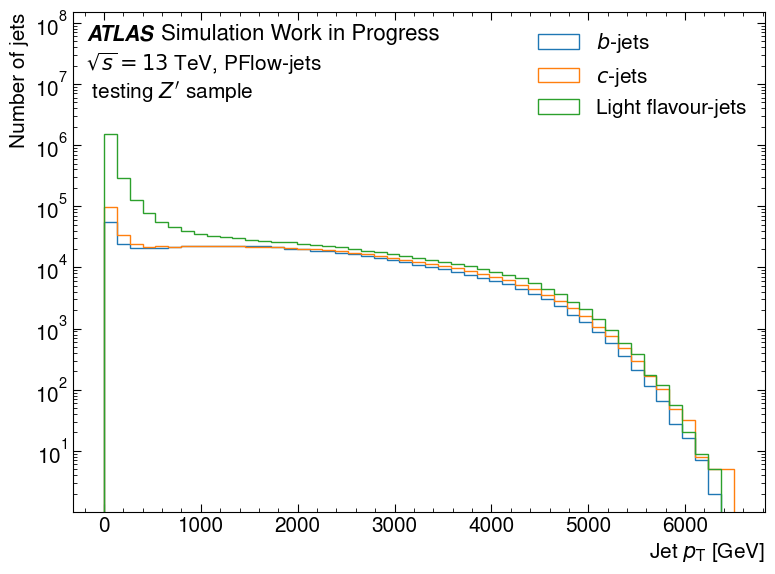

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(0, 6500, 50)
ax.hist(zprime["pt"][zprime["HadronConeExclTruthLabelID"]==5]/1000, bins=bins, histtype="step", label="$b$-jets")
ax.hist(zprime["pt"][zprime["HadronConeExclTruthLabelID"]==4]/1000, bins=bins, histtype="step", label="$c$-jets")
ax.hist(zprime["pt"][zprime["HadronConeExclTruthLabelID"]==0]/1000, bins=bins, histtype="step", label="Light flavour-jets")
ax.set_xlabel("Jet $p_{\mathrm{T}}$ [GeV]", loc="right")
ax.set_ylabel("Number of jets", loc="top")
ax.set_yscale("log")

atlasify.atlasify(
    axes=ax,
    atlas="Simulation Work in Progress",
    subtext="$\sqrt{s}=13$ TeV, PFlow-jets \n testing $Z'$ sample",
    enlarge=50,
    font_size=15,
    sub_font_size=15,
    subtext_distance=0.15,
)
plt.tight_layout()
plt.savefig("figures/pt_zprime.pdf", bbox_inches="tight")
plt.show()

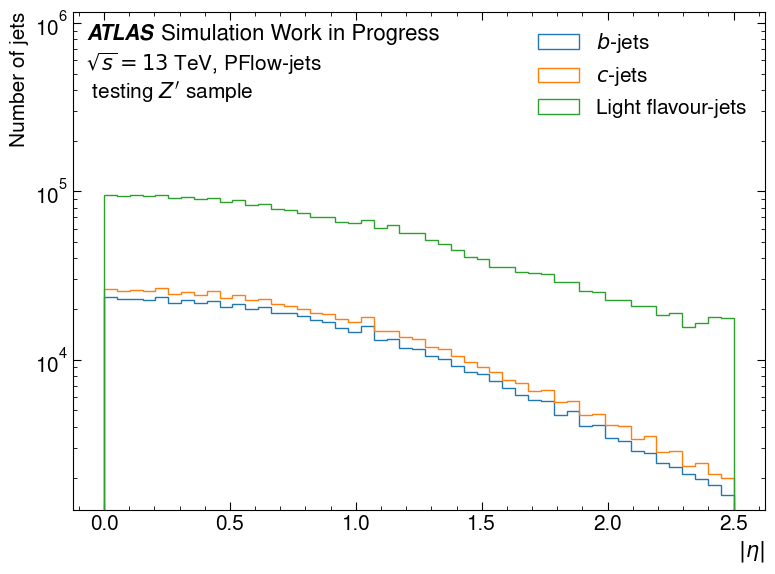

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(0, 2.5, 50)
ax.hist((zprime["eta"].abs())[zprime["HadronConeExclTruthLabelID"]==5], bins=bins, histtype="step", label="$b$-jets")
ax.hist((zprime["eta"].abs())[zprime["HadronConeExclTruthLabelID"]==4], bins=bins, histtype="step", label="$c$-jets")
ax.hist((zprime["eta"].abs())[zprime["HadronConeExclTruthLabelID"]==0], bins=bins, histtype="step", label="Light flavour-jets")
ax.set_xlabel("$|\eta|$", loc="right")
ax.set_ylabel("Number of jets", loc="top")
ax.set_yscale("log")

atlasify.atlasify(
    axes=ax,
    atlas="Simulation Work in Progress",
    subtext="$\sqrt{s}=13$ TeV, PFlow-jets \n testing $Z'$ sample",
    enlarge=10,
    font_size=15,
    sub_font_size=15,
    subtext_distance=0.15,
)
plt.tight_layout()
plt.savefig("figures/absEta_zprime.pdf", bbox_inches="tight")
plt.show()

In [12]:
with h5.File(zprime_path, "r") as f:
    # print(len(f["tracks_loose"]))
    ntracks_zprime = f["tracks_loose"]["valid"][:].sum(axis=1)

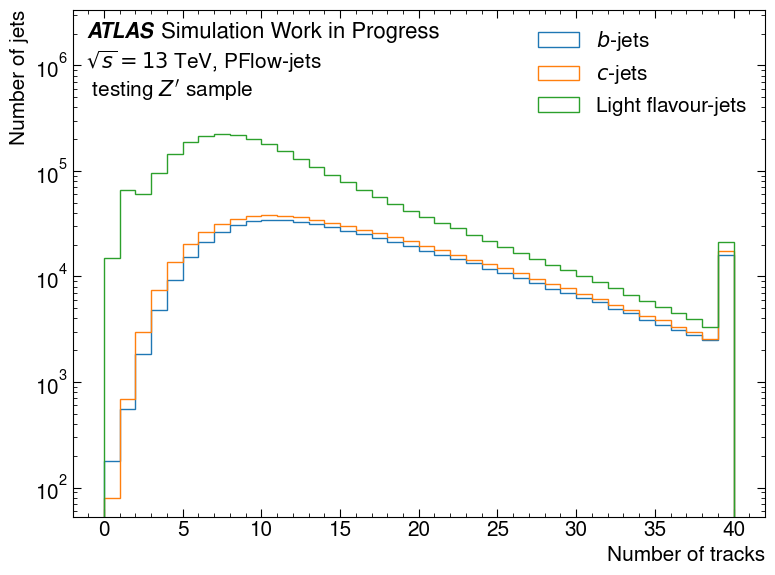

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(0, 40, 41)
ax.hist(ntracks_zprime[zprime["HadronConeExclTruthLabelID"]==5], bins=bins, histtype="step", label="$b$-jets")
ax.hist(ntracks_zprime[zprime["HadronConeExclTruthLabelID"]==4], bins=bins, histtype="step", label="$c$-jets")
ax.hist(ntracks_zprime[zprime["HadronConeExclTruthLabelID"]==0], bins=bins, histtype="step", label="Light flavour-jets")
ax.set_xlabel("Number of tracks", loc="right")
ax.set_ylabel("Number of jets", loc="top")
ax.set_yscale("log")

atlasify.atlasify(
    axes=ax,
    atlas="Simulation Work in Progress",
    subtext="$\sqrt{s}=13$ TeV, PFlow-jets \n testing $Z'$ sample",
    enlarge=10,
    font_size=15,
    sub_font_size=15,
    subtext_distance=0.15,
)
plt.tight_layout()
plt.savefig("figures/ntracks_zprime.pdf", bbox_inches="tight")
plt.show()

In [ ]:
validation_path = "/home/suzukiy/ftag/umami-dataset/umami-020-GNx/prepared/validation_PFlow.h5"

In [2]:
validation_path = "/home/suzukiy/ftag/umami-dataset/umami-020-GNx/preprocessed/PFlow-hybrid-validation-resampled_scaled_shuffled.h5"
file_util.display_h5_file(validation_path)

Displaying contents of file: /home/suzukiy/ftag/umami-dataset/umami-020-GNx/preprocessed/PFlow-hybrid-validation-resampled_scaled_shuffled.h5
/jets: [Group]
  /jets/add_labels: [Group]
    /jets/add_labels/mass: [Dataset](3999999,)
    /jets/add_labels/pt: [Dataset](3999999,)
  /jets/inputs: [Dataset](3999999, 2)
  /jets/labels: [Dataset](3999999,)
  /jets/labels_one_hot: [Dataset](3999999, 3)
  /jets/weight: [Dataset](3999999,)
/tracks_loose: [Group]
  /tracks_loose/inputs: [Dataset](3999999, 40, 21)
  /tracks_loose/labels: [Group]
    /tracks_loose/labels/truthOriginLabel: [Dataset](3999999, 40)
    /tracks_loose/labels/truthVertexIndex: [Dataset](3999999, 40)
  /tracks_loose/valid: [Dataset](3999999, 40)


In [3]:
with h5.File(validation_path, "r") as f:
    valid_pt = f["jets/add_labels/pt"][:]
    valid_label = f["jets/labels"][:]
    valid_eta = f["jets/inputs"][:][:,0]
    valid_ntracks = f["tracks_loose/valid"][:].sum(axis=1)

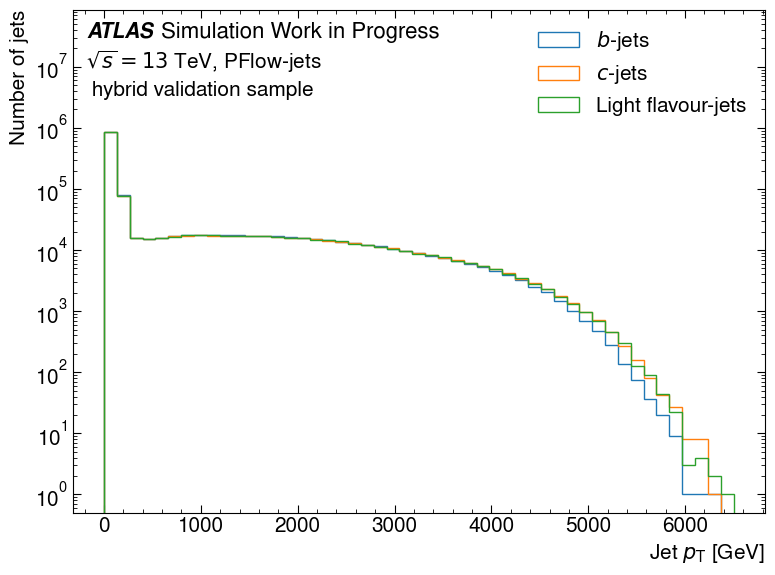

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(0, 6500, 50)
ax.hist(valid_pt[valid_label==0]/1000, bins=bins, histtype="step", label="$b$-jets")
ax.hist(valid_pt[valid_label==1]/1000, bins=bins, histtype="step", label="$c$-jets")
ax.hist(valid_pt[valid_label==2]/1000, bins=bins, histtype="step", label="Light flavour-jets")
ax.set_xlabel("Jet $p_{\mathrm{T}}$ [GeV]", loc="right")
ax.set_ylabel("Number of jets", loc="top")
ax.set_yscale("log")

atlasify.atlasify(
    axes=ax,
    atlas="Simulation Work in Progress",
    subtext="$\sqrt{s}=13$ TeV, PFlow-jets \n hybrid validation sample",
    enlarge=50,
    font_size=15,
    sub_font_size=15,
    subtext_distance=0.15,
)
plt.tight_layout()
plt.savefig("figures/pt_validation.pdf", bbox_inches="tight")
plt.show()

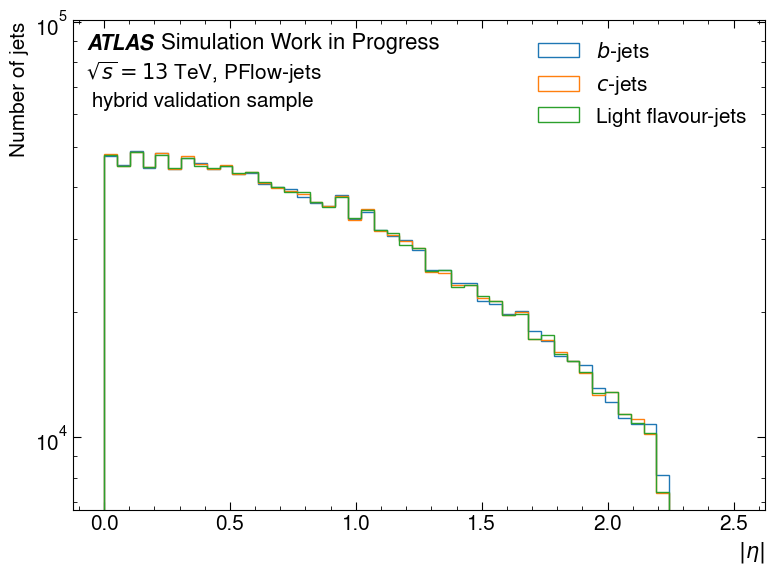

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(0, 2.5, 50)
ax.hist(np.abs(valid_eta[valid_label==0]), bins=bins, histtype="step", label="$b$-jets")
ax.hist(np.abs(valid_eta[valid_label==1]), bins=bins, histtype="step", label="$c$-jets")
ax.hist(np.abs(valid_eta[valid_label==2]), bins=bins, histtype="step", label="Light flavour-jets")
ax.set_xlabel("$|\eta|$", loc="right")
ax.set_ylabel("Number of jets", loc="top")
ax.set_yscale("log")

atlasify.atlasify(
    axes=ax,
    atlas="Simulation Work in Progress",
    subtext="$\sqrt{s}=13$ TeV, PFlow-jets \n hybrid validation sample",
    enlarge=2,
    font_size=15,
    sub_font_size=15,
    subtext_distance=0.15,
)
plt.tight_layout()
plt.savefig("figures/absEta_validation.pdf", bbox_inches="tight")
plt.show()

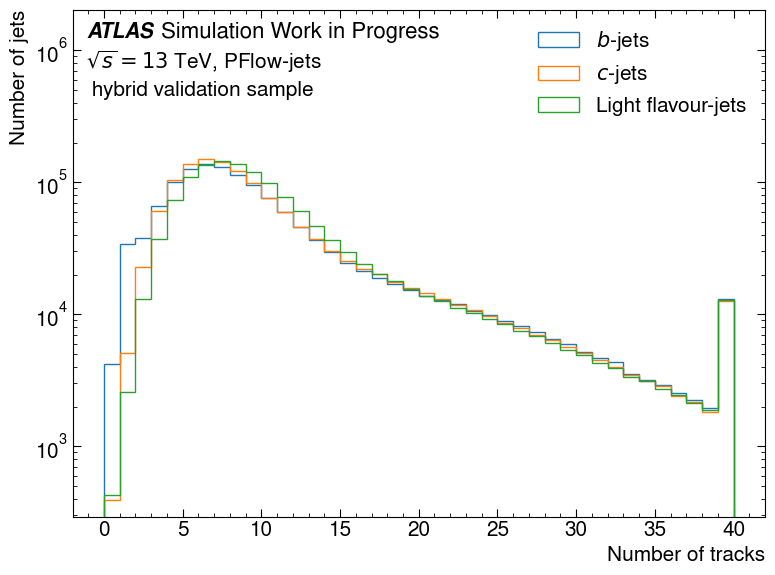

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(0, 40, 41)
ax.hist(valid_ntracks[valid_label==0], bins=bins, histtype="step", label="$b$-jets")
ax.hist(valid_ntracks[valid_label==1], bins=bins, histtype="step", label="$c$-jets")
ax.hist(valid_ntracks[valid_label==2], bins=bins, histtype="step", label="Light flavour-jets")
ax.set_xlabel("Number of tracks", loc="right")
ax.set_ylabel("Number of jets", loc="top")
ax.set_yscale("log")

atlasify.atlasify(
    axes=ax,
    atlas="Simulation Work in Progress",
    subtext="$\sqrt{s}=13$ TeV, PFlow-jets \n hybrid validation sample",
    enlarge=10,
    font_size=15,
    sub_font_size=15,
    subtext_distance=0.15,
)
plt.tight_layout()
plt.savefig("figures/ntracks_validation.pdf", bbox_inches="tight")
plt.show()

In [31]:
np.unique(valid_label, return_counts=True)

(array([0, 1, 2], dtype=uint8), array([1333333, 1333333, 1333333]))

In [33]:
ttbar["HadronConeExclExtendedTruthLabelID"].value_counts() / len(ttbar)

0     0.506960
5     0.362549
4     0.082622
15    0.036517
44    0.004268
55    0.003595
54    0.003488
Name: HadronConeExclExtendedTruthLabelID, dtype: float64

In [34]:
zprime["HadronConeExclExtendedTruthLabelID"].value_counts() / len(zprime)

0     0.667500
4     0.140093
5     0.128322
44    0.026809
15    0.017800
55    0.011060
54    0.008417
Name: HadronConeExclExtendedTruthLabelID, dtype: float64

In [6]:
with h5.File(validation_path, "r") as f:
    valid_truthOriginLabel = f["tracks_loose/labels/truthOriginLabel"][:]

In [7]:
track_origin_label_names = [
    "Pileup",
    "Fake",
    "Primary",
    "FromB",
    "FromBC",
    "FromC",
    "FromTau",
    "OtherSecondary"
]

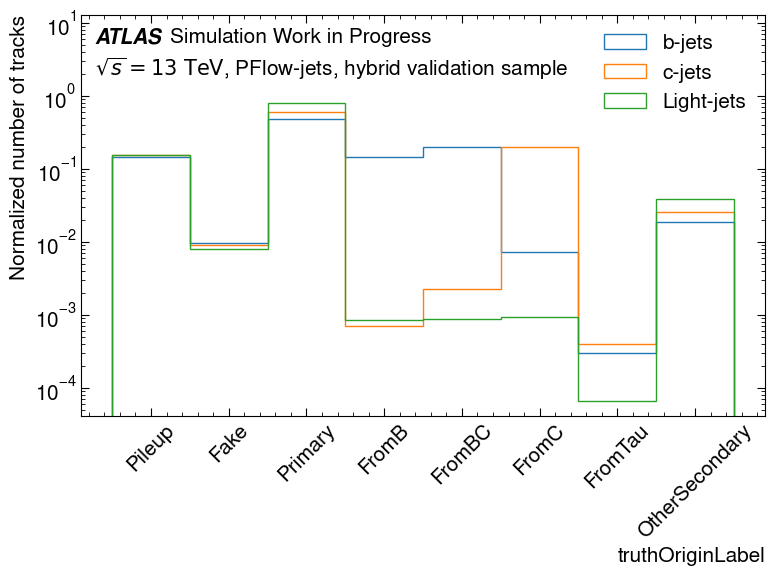

In [9]:
%matplotlib inline
plt.rcParams["font.size"] = 15
fig, ax = plt.subplots(figsize=(8, 6))
entries, bins, _ = ax.hist(valid_truthOriginLabel[valid_label==2].flatten(), bins=[0, 1, 2, 3, 4, 5, 6, 7, 8], histtype="step", label="b-jets", density=True)
ax.hist(valid_truthOriginLabel[valid_label==1].flatten(), bins=[0, 1, 2, 3, 4, 5, 6, 7, 8], histtype="step", label="c-jets", density=True)
ax.hist(valid_truthOriginLabel[valid_label==0].flatten(), bins=[0, 1, 2, 3, 4, 5, 6, 7, 8], histtype="step", label="Light-jets", density=True)
ax.set_yscale("log")
ax.set_xlabel("truthOriginLabel", loc="right")
ax.set_ylabel("Normalized number of tracks", loc="top")
ax.set_xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
ax.set_xticklabels(track_origin_label_names, rotation=45)
ax.legend()
atlasify.atlasify(
    atlas="Simulation Work in Progress",
    subtext = "$\sqrt{s}=13 \ \mathrm{TeV}$, PFlow-jets, hybrid validation sample",
    enlarge=10,
    font_size = 15,
    label_font_size = 15,
    sub_font_size = 15,
    subtext_distance = 0.2,
)
plt.tight_layout()
plt.savefig("./figures/track_origin_label_hybrid.pdf", bbox_inches="tight")
plt.show()